<a href="https://colab.research.google.com/github/Advanced-Research-Centre/QASM/blob/main/Algorithmic%20Hamiltonian%20Complexity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
%%capture
!pip install pybdm
!pip install qiskit
!pip install numfi

In [3]:
import numpy as np
import scipy as sp
from pybdm import BDM
import qiskit
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, execute, transpile
import qiskit.quantum_info as qi

def show_figure(fig):
    # See https://github.com/Qiskit/qiskit-terra/issues/1682
    new_fig = plt.figure()
    new_mngr = new_fig.canvas.manager
    new_mngr.canvas.figure = fig
    fig.set_canvas(new_mngr.canvas)
    plt.show(fig)

In [95]:
H = np.array([[-1,1], [1,-1]])
t = 1/5
r = np.pi*t
U = np.round(sp.linalg.expm(r*H*1j),8)
print(U)

[[0.6545085-0.47552826j 0.3454915+0.47552826j]
 [0.3454915+0.47552826j 0.6545085-0.47552826j]]


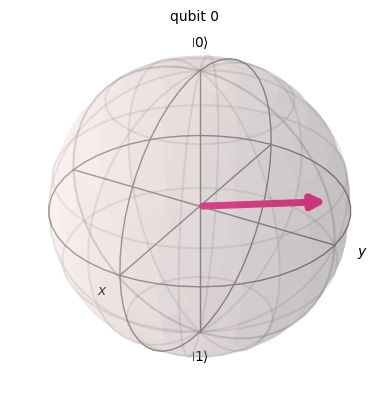

In [96]:
qc = QuantumCircuit(1)
qc.unitary(U, [0])
sv = qi.Statevector.from_instruction(qc)
show_figure(plot_bloch_multivector(sv, title=""))

In [97]:
Ur = U.real
Ui = U.imag

w = 8 # data width
f = 4 # fraction width

Ur_quantized = np.round(Ur*(2**f)).astype(int)
Ur_bin = np.vectorize(np.binary_repr)(Ur_quantized,w)

Ui_quantized = np.round(Ui*(2**f)).astype(int)
Ui_bin = np.vectorize(np.binary_repr)(Ui_quantized,w)

U_bin = np.array(list(''.join(list(np.concatenate((np.ndarray.flatten(Ur_bin),np.ndarray.flatten(Ui_bin)))))),dtype=int)

print(U_bin)

bdm1d = BDM(ndim=1)
print("BDM =",bdm1d.bdm(U_bin))

[0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0]
BDM = 162.18419501888266


In [83]:
# Failed method (for fractions/complex)

U2 = np.kron(U,np.eye(2)) # since
print(U2)

U2_bin = np.array(U2 , dtype = int)
bdm2d = BDM(ndim=2)
print("BDM =",bdm2d.bdm(U2_bin))

[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
BDM = 26.415903926263844


<ipython-input-83-844ce37bbaa3>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  U2_bin = np.array(U2 , dtype = int)


In [ ]:
# Failed method

U2r = U2.real
U2i = U2.imag
print(U2r, U2i)

f = 4 # fraction width

U2r_quantized = np.round(U2r*(2**f)).astype(int)
U2r_bin = np.vectorize(np.binary_repr)(U2r_quantized).astype(int)
print(U2r_bin)

U2i_quantized = np.round(U2i*(2**f)).astype(int)
U2i_bin = np.vectorize(np.binary_repr)(U2i_quantized).astype(int)
print(U2i_bin)

U2_bin = np.concatenate((np.ndarray.flatten(U2r_bin),np.ndarray.flatten(U2i_bin)))

print(U2_bin)

bdm1d = BDM(ndim=1)
print("BDM =",bdm1d.bdm(U2_bin))